### Support Vector Machines(Classification)

1. It is good for small datasets only
2. Computationally expensive

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Seperate X and Y

In [5]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [6]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [8]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Create a preprocessing pipeline for X

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Create a train test split for X_pre and Y

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=4)

In [15]:
xtrain.shape

(100, 4)

In [16]:
xtest.shape

(50, 4)

### Create a SVM model

In [17]:
from sklearn.svm import SVC
model = SVC(probability=True)
model.fit(xtrain, ytrain)

d:\VS Code\WAKAD_THUS\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

### Evaluate the model

In [18]:
model.score(xtrain, ytrain)

0.99

In [19]:
model.score(xtest, ytest)

0.96

### Predict data for train and test

In [20]:
ypred_tr =  model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [21]:
ypred_tr[0:5]

array(['setosa', 'versicolor', 'virginica', 'virginica', 'versicolor'],
      dtype=object)

In [22]:
ytrain.head()

,species
27,setosa
69,versicolor
118,virginica
136,virginica
97,versicolor


In [23]:
ypred_ts[0:5]

array(['virginica', 'setosa', 'virginica', 'virginica', 'virginica'],
      dtype=object)

In [24]:
ytest.head()

,species
128,virginica
18,setosa
130,virginica
105,virginica
107,virginica


### Create a confusion matrix for test data

In [25]:
c = model.classes_
c

array(['setosa', 'versicolor', 'virginica'], dtype=object)

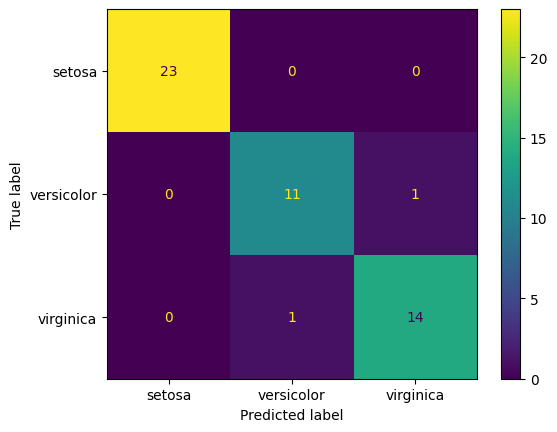

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

### Print classification report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.92      0.92      0.92        12
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.95      0.95      0.95        50
weighted avg       0.96      0.96      0.96        50



### Predicting out of sample data

In [28]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [29]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


# Apply pre.transform on out of sample data

In [30]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


### Predict the species

In [31]:
preds = model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [32]:
probs = model.predict_proba(xnew_pre)
probs

array([[0.0079888 , 0.95617975, 0.03583145],
       [0.01172656, 0.01407467, 0.97419877],
       [0.02227163, 0.96014315, 0.01758522],
       [0.56394468, 0.31378448, 0.12227084],
       [0.01309452, 0.12068395, 0.86622153],
       [0.9407064 , 0.03450221, 0.02479139],
       [0.03185904, 0.95843463, 0.00970633],
       [0.01056611, 0.02565165, 0.96378224],
       [0.95265364, 0.0259976 , 0.02134876],
       [0.74885875, 0.17283203, 0.07830922],
       [0.01017855, 0.98232658, 0.00749488],
       [0.01073808, 0.97865848, 0.01060343],
       [0.0140761 , 0.01806146, 0.96786244],
       [0.01511467, 0.87525162, 0.10963372],
       [0.01775087, 0.42865271, 0.55359642]])

In [33]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [34]:
import numpy as np 
max_prob = np.max(probs, axis=1)

In [35]:
max_prob

array([0.95617975, 0.97419877, 0.96014315, 0.56394468, 0.86622153,
       0.9407064 , 0.95843463, 0.96378224, 0.95265364, 0.74885875,
       0.98232658, 0.97865848, 0.96786244, 0.87525162, 0.55359642])

### Save above results to csv

In [37]:
xnew['species_pred'] = preds
xnew['species_prob'] = max_prob

In [38]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,species_prob
0,5.5,2.5,4.0,1.3,versicolor,0.956180
1,6.9,3.1,5.1,2.3,virginica,0.974199
2,5.1,2.5,3.0,1.1,versicolor,0.960143
3,4.4,2.9,NaN,0.2,setosa,0.563945
4,5.9,3.0,5.1,1.8,virginica,0.866222
5,5.5,3.5,1.3,0.2,setosa,0.940706
6,5.6,NaN,3.6,1.3,versicolor,0.958435
7,6.5,3.0,5.2,2.0,virginica,0.963782
8,5.3,3.7,1.5,0.2,setosa,0.952654
9,5.1,3.4,1.5,NaN,setosa,0.748859


### Saving above file to csv

In [39]:
xnew.to_csv('SVMResults.csv', index=False)